# Decision Trees for Regression

In this example, we will learn how to train a decision tree with **scikit-learn**. <br/>

#### Dataset: California Housing

As an example dataset we will use the California Housing dataset. The data contains information from the 1990 California census.  A description of this dataset can be found here: https://www.kaggle.com/datasets/camnugent/california-housing-prices

Fortunately, the dataset is already provided in scikit-learn. So, there is no need to fetch the data from Kaggle manually. See: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [11]:
# Import modules which are relevant for this project
from sklearn.datasets import fetch_california_housing
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# To ensure reproducibility

RANDOM_STATE = 42

np.random.seed(RANDOM_STATE)

## Load the dataset

In [13]:
dataset = fetch_california_housing(as_frame=True)

In [14]:
housing_df = dataset['data']
target_df = dataset['target']

housing_df['HousePrice'] = target_df

## Prepare a training and testing set

Like we did in our linear regression example, we split the datasets into two parts. <br/>
80% of the data is used for training, and 20% is used for testing.

In [15]:
train_df, test_df = train_test_split(housing_df, test_size=0.2)

# Prepare training features 
x_train = train_df.loc[:, train_df.columns != 'HousePrice'].values
y_train = train_df['HousePrice'].values

# Prepare testing features 
x_test = test_df.loc[:, test_df.columns != 'HousePrice'].values
y_test = test_df['HousePrice'].values 

## Training the first decision tree regressor

We now train our first decision tree, more precisely, a decision tree regressor also referred to as `DecisionTreeRegressor` in scikit. 

In [16]:
# Create a new decision tree regressor
model = DecisionTreeRegressor()

In [17]:
# Fit the model
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [18]:
# Evaluate the performance of the regression model
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)

Train RMSE: 3.015225317064558e-16
Test RMSE: 0.7036663198621096


Well interesting ... <br/>
As can be seen, the RMSE on the training set is zero, which means that the model perfectly predicts the training data. However, the RMSE on the testing set is extremely high (\\$70683). This indicates that the model **overfits the training data**. Overfitting simply means that the model performs well on the training data, but it does not generalize well.

### How tree depth affects overfitting

The depth of a decision tree controls its expressiveness. In our case, this means that the deeper a tree becomes, the more precise it can predict the value of a sample. However, the decision tree also becomes more likely to overfit the training data.

To better understand how this looks like in practice, we can plot the RMSE for the training and testing set for different tree depths.

In [19]:
train_scores = []
test_scores = []

for depth in range(1, 36):
    
    model = DecisionTreeRegressor(max_depth=depth)
    
    model.fit(x_train, y_train)
    
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

    train_scores.append((depth, rmse_train))
    test_scores.append((depth, rmse_test))


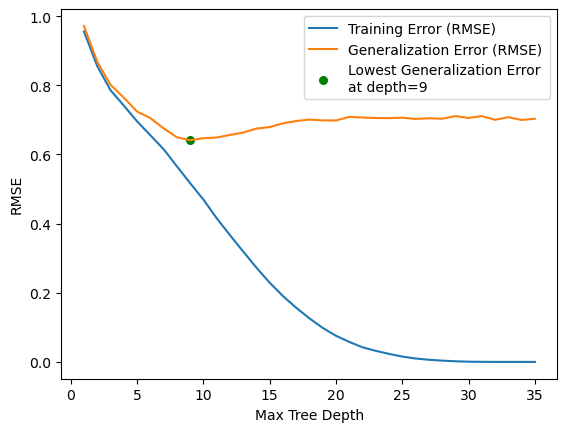

In [20]:
x, y = zip(*train_scores)
plt.plot(x, y, label='Training Error (RMSE)')

x, y = zip(*test_scores)
plt.plot(x, y, label='Generalization Error (RMSE)')

plt.scatter(x[np.argmin(y)], np.min(y), s=30, c='g', label=f'Lowest Generalization Error \nat depth={x[np.argmin(y)]}')

plt.xlabel('Max Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

As can be seen, the ideal decision tree would have a maximum depth of 9 as this tree has the lowest generalization error. Once we further increase the depth of the tree, we can clearly see the effect of overfitting since the generalization error starts to increase.

So we simply set the maximum depth to 9? Well, unfortunately, it's not that easy. Remember the golden rule, which says "You must not use testing data for training or parameter tuning"

Unfortunately, that's exactly what we just did. We tuned the parameters of the model (max depth) based on the testing set. So what to do? ... Well, we need a third set for parameter tuning --- A validation set